In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1 Conhecendo os dados

In [8]:
cbf = pd.read_csv('/content/campeonato-brasileiro-full.csv')

In [108]:
cbf.head()

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,4-2-3-1,4-2-3-1,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,4-2-3-1,4-2-3-1,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,4-2-3-1,4-2-3-1,NaN,NaN,-,maracana,1,1,RJ,PR,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,4-2-3-1,4-2-3-1,NaN,NaN,-,serra dourada,2,2,GO,PA,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,4-2-3-1,4-2-3-1,NaN,NaN,-,beira rio,1,1,RS,SP,-


In [109]:
print(cbf.isnull().sum())

ID                       0
rodada                   0
data                     0
hora                     0
dia                      0
mandante                 0
visitante                0
formacao_mandante        0
formacao_visitante       0
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_placar          0
visitante_placar         0
mandante_estado          0
visitante_estado         0
estado_vencedor          0
dtype: int64


In [110]:
cbf.shape

(7645, 18)

In [111]:
cbf['vencedor'].unique

<bound method Series.unique of 0            Guarani
1       Athletico-PR
2                  -
3                  -
4                  -
            ...     
7640      Bragantino
7641               -
7642       Juventude
7643          Gremio
7644               -
Name: vencedor, Length: 7645, dtype: object>

In [112]:
cbf['vencedor'].value_counts()

-                  2015
Sao Paulo           338
Flamengo            317
Santos              317
Internacional       304
Corinthians         296
Gremio              295
Cruzeiro            293
Atletico-MG         293
Palmeiras           286
Fluminense          285
Athletico-PR        279
Botafogo-RJ         214
Vasco               196
Goias               189
Coritiba            169
Figueirense         142
Sport               131
Vitoria             123
Bahia               115
Ponte Preta         114
Parana               83
Juventude            82
Fortaleza            78
Chapecoense          70
Sao Caetano          65
Ceara                65
Atletico-GO          64
Avai                 57
Nautico              54
Criciuma             50
Paysandu             41
America-MG           38
Guarani              36
Portuguesa           31
Bragantino           27
Santa Cruz           15
Barueri              12
Santo Andre          11
Brasiliense          10
Cuiaba               10
Ipatinga        

# 2 Tratando os dados que serão úteis 

In [9]:
cbf['vencedor'].fillna('Empate', inplace=True)
cbf.loc[cbf['vencedor'] == '-', 'vencedor'] = 'Empate'
cbf['vencedor']

0            Guarani
1       Athletico-PR
2             Empate
3             Empate
4             Empate
            ...     
7640      Bragantino
7641          Empate
7642       Juventude
7643          Gremio
7644          Empate
Name: vencedor, Length: 7645, dtype: object

Os registros vazios onde não tem vencedor, são atualizados para "Empate"

In [104]:
cbf['formacao_mandante'].mode()
cbf['formacao_mandante'].fillna('4-2-3-1', inplace=True)
cbf['formacao_mandante']

0       4-2-3-1
1       4-2-3-1
2       4-2-3-1
3       4-2-3-1
4       4-2-3-1
         ...   
7640    4-2-3-1
7641    4-2-3-1
7642      3-4-3
7643    4-2-3-1
7644    3-4-2-1
Name: formacao_mandante, Length: 7645, dtype: object

Preenchendo os valores vazios, com a moda

In [106]:
cbf['formacao_visitante'].mode()
cbf['formacao_visitante'].fillna('4-2-3-1', inplace=True)
cbf['formacao_visitante']

0       4-2-3-1
1       4-2-3-1
2       4-2-3-1
3       4-2-3-1
4       4-2-3-1
         ...   
7640    3-4-2-1
7641    3-4-2-1
7642      4-3-3
7643    4-2-3-1
7644      4-4-2
Name: formacao_visitante, Length: 7645, dtype: object

# 3 Levantamento de hipótese

1.   Ser mandante ou visitante influência na vitória ?
2.   A formação influência na vitória ?

In [113]:
cbf['result'] = 'teste'
cbf.loc[cbf['mandante'] == cbf['vencedor'], 'result'] = 'mandante'
cbf.loc[cbf['visitante'] == cbf['vencedor'], 'result'] = 'visitante'
cbf.loc[cbf['result'] == 'teste', 'result'] = 'Empate'
cbf['result'].value_counts()

mandante     3833
Empate       2015
visitante    1797
Name: result, dtype: int64

1 Sim, os times mandantes vencem com mais frequência

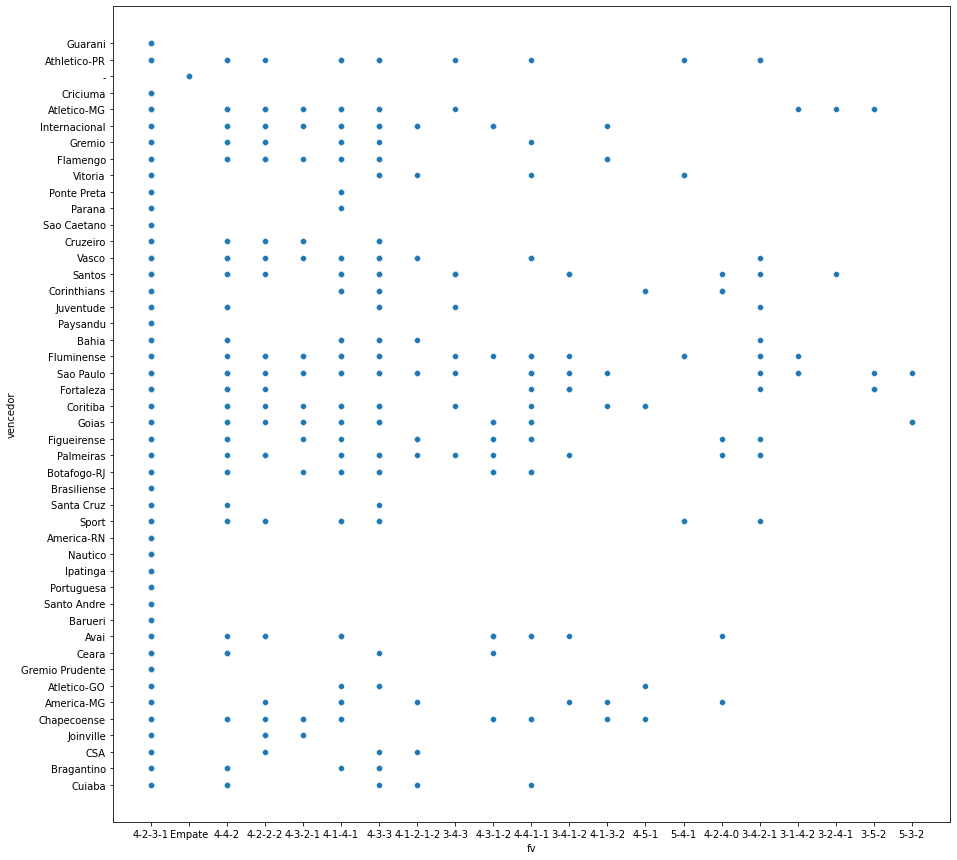

In [116]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore')
formacao = oh.fit_transform(cbf['fv'].values.reshape(-1,1)).toarray()
vitoria = oh.fit_transform(cbf['vencedor'].values.reshape(-1,1)).toarray()
f, ax = plt.subplots(figsize = (15, 15))
sns.scatterplot(x = 'fv', y = 'vencedor', data = cbf);

In [115]:
from numpy import NAN
cbf['fv'] = 'Empate'
cbf.loc[cbf['mandante'] == cbf['vencedor'], 'fv'] = cbf['formacao_mandante']
cbf.loc[cbf['visitante'] == cbf['vencedor'], 'fv'] = cbf['formacao_visitante']

cbf['fl'] = NAN
cbf.loc[cbf['mandante'] != cbf['vencedor'], 'fl' ] = cbf['formacao_mandante']

In [117]:
cbf.drop(cbf[cbf['fv'] == "Empate"].index, inplace=True)
cbf['fv'].value_counts()

4-2-3-1      4885
4-1-4-1       208
4-3-3         180
4-4-2         106
4-2-2-2        40
4-3-2-1        33
4-4-1-1        31
4-3-1-2        27
3-4-1-2        22
3-4-2-1        20
4-1-2-1-2      16
3-4-3          14
4-2-4-0         9
4-1-3-2         7
4-5-1           7
5-4-1           7
3-5-2           6
5-3-2           6
3-1-4-2         4
3-2-4-1         2
Name: fv, dtype: int64

In [118]:
cbf['fl'].value_counts()

4-2-3-1      1511
4-1-4-1        76
4-3-3          63
4-4-2          46
4-3-1-2        14
5-4-1          11
4-4-1-1        11
3-4-1-2        10
4-3-2-1        10
3-4-2-1         9
4-2-2-2         8
4-5-1           7
3-4-3           6
4-1-2-1-2       5
3-5-2           3
4-2-4-0         2
3-1-4-2         2
5-3-2           2
4-1-3-2         1
Name: fl, dtype: int64

In [119]:
f1, f2 = cbf['formacao_mandante'], cbf['formacao_visitante']
Formacao = pd.concat([f1, f2])
Formacao.dropna()
Formacao.value_counts()

4-2-3-1      9638
4-1-4-1       456
4-3-3         361
4-4-2         237
4-3-2-1        76
4-4-1-1        65
4-2-2-2        64
4-3-1-2        57
3-4-1-2        53
3-4-2-1        47
5-4-1          40
3-4-3          34
4-1-2-1-2      32
4-5-1          22
3-5-2          22
4-2-4-0        19
5-3-2          14
4-1-3-2        10
3-1-4-2         9
3-2-4-1         2
3-5-1-1         2
dtype: int64

2 Com os dados disponíveis, é possível saber a taxa de vitória das formações, mas não sua influência, pois ainda existe uma variável não documentada : "Elenco".